# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname:

Student name:
    
ID:

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzhuzhiji MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 3444567
np.random.seed(ID)

In [4]:
#load the Kuzhuzhiji MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

#X, y = np.load("data/svhn_images.npy").reshape(-1, 24*24), np.load("data/svhn_labels.npy")
X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test,:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


(600, 784) (4000, 784) (600,) (4000,)
Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [67 67 58 71 54 60 62 57 50 54]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),#.reshape(24,24),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


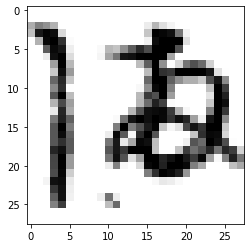

LABEL: 6
INPUT:


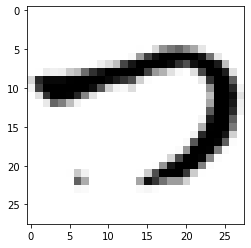

LABEL: 3
INPUT:


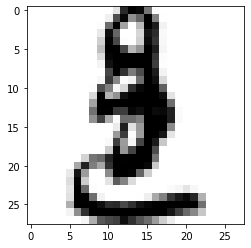

LABEL: 8
INPUT:


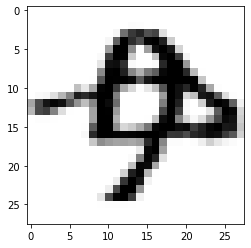

LABEL: 7


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [ 0.01, 0.1, 1, 10]}

#run linear SVM
linear_SVM = SVC(kernel='linear')
linear_SVM_CV = GridSearchCV(linear_SVM, parameters,cv=4)
linear_SVM_CV.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(linear_SVM_CV.best_params_)

print("Score with best parameters:")
print(linear_SVM_CV.best_score_)
print()
print("All scores on the grid:")
print(linear_SVM_CV.cv_results_['mean_test_score'])

C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.01}
Score with best parameters:
0.7366666666666667

All scores on the grid:
[0.73666667 0.735      0.735      0.735     ]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2) #,coef0=1) #,gamma=1
poly2_SVM_CV = GridSearchCV(poly2_SVM, parameters,cv=4)
poly2_SVM_CV.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(poly2_SVM_CV.best_params_)

print("Score with best parameters:")
print(poly2_SVM_CV.best_score_)

print("\nAll scores on the grid:")
print(poly2_SVM_CV.cv_results_['params'])
print(poly2_SVM_CV.cv_results_['mean_test_score'])

C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 1.0}
Score with best parameters:
0.7566666666666667

All scores on the grid:
[{'C': 0.01, 'gamma': 0.01}, {'C': 0.01, 'gamma': 0.1}, {'C': 0.01, 'gamma': 1.0}, {'C': 0.1, 'gamma': 0.01}, {'C': 0.1, 'gamma': 0.1}, {'C': 0.1, 'gamma': 1.0}, {'C': 1, 'gamma': 0.01}, {'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 1.0}]
[0.11833333 0.75333333 0.75666667 0.44       0.75666667 0.75666667
 0.75333333 0.75666667 0.75666667]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1, 1]}

#run SVM with poly of higher degree kernel
degree = 3
poly_SVM = SVC(kernel='poly',degree=degree)
poly_SVM_CV = GridSearchCV(poly_SVM, parameters,cv=4)
poly_SVM_CV.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(poly_SVM_CV.best_params_)

print("Score with best parameters:")
print(poly_SVM_CV.best_score_)

print("\nAll scores on the grid:")
print(poly_SVM_CV.cv_results_['mean_test_score'])

C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 1}
Score with best parameters:
0.6883333333333334

All scores on the grid:
[0.11833333 0.67666667 0.68833333 0.38       0.68833333 0.68833333
 0.67333333 0.68833333 0.68833333]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
rbf_SVM_CV = GridSearchCV(rbf_SVM, parameters,cv=4)
rbf_SVM_CV.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(rbf_SVM_CV.best_params_)

print("Score with best parameters:")
print(rbf_SVM_CV.best_score_)

print("\nAll scores on the grid:")
print(rbf_SVM_CV.cv_results_['mean_test_score'])

C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.795

All scores on the grid:
[0.11833333 0.20166667 0.11833333 0.11833333 0.6        0.76666667
 0.14666667 0.11833333 0.74833333 0.795      0.155      0.11833333
 0.75333333 0.795      0.155      0.11833333]


## TO DO 5
What do you observe when using RBF and polynomial kernels on this dataset ?

## TO DO 6
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf',C=10,gamma=0.01)
best_SVM.fit(X_train, y_train)
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.180250


In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


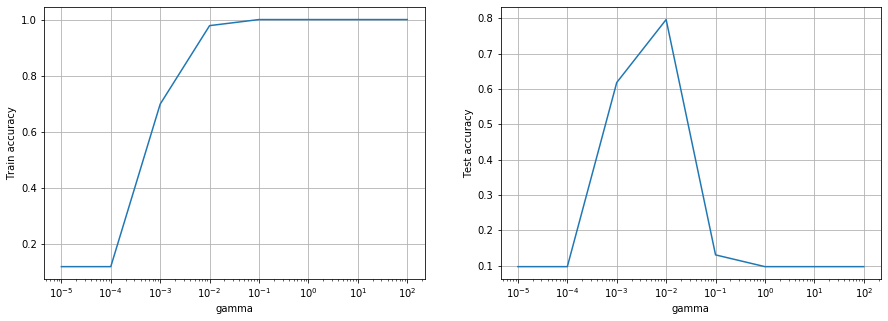

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []
for gamma in gamma_values:
    rbf_SVM = SVC(kernel='rbf', gamma=gamma, C=1)
    rbf_SVM.fit(X_train, y_train)
    train_acc_list.append(rbf_SVM.score(X_train, y_train))
    test_acc_list.append(rbf_SVM.score(X_test, y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## More data
Now let's do the same but using more data points for training.

### TO DO 7
Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [209 204 215 193 210 194 165 197 197 216]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

In [16]:
#get training and test error for the best SVM model from CV
rbf_SVM = SVC(kernel='rbf',C=10,gamma=0.01)
rbf_SVM.fit(X_train, y_train)
training_error = 1. - rbf_SVM.score(X_train,y_train)
test_error = 1. - rbf_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.115879


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

In [17]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(penalty='l2', C=9999999, solver='newton-cg') # regularization not included
lr.fit(X_train, y_train)
training_error = 1. - lr.score(X_train,y_train)
test_error = 1. - lr.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.299724


In [18]:
regL2 = linear_model.LogisticRegression(penalty='l2', C=1, solver='newton-cg')
regL2.fit(X_train, y_train)
training_error = 1. - regL2.score(X_train,y_train)
test_error = 1. - regL2.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best regularized logistic regression training error: 0.008000
Best regularized logistic regression test error: 0.254724


## TO DO 9
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


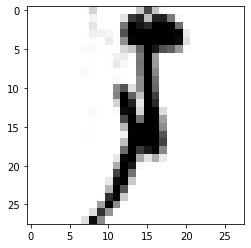

LABEL: 6
Logistic regression prediction:  2
SVM prediction:  6


In [19]:
LR_prediction = lr.predict(X_test)
SVM_prediction = rbf_SVM.predict(X_test)
i = 0
found = False
while ( not found & (i<len(y_test))):
    if (LR_prediction[i] != y_test[i]) and (SVM_prediction[i] == y_test[i]):
        plot_input(X_test, y_test, i)
        print("Logistic regression prediction: ", LR_prediction[i])
        print("SVM prediction: ", SVM_prediction[i])
        found = True
        i += 1
    else:
        i += 1

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = skm.confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5791 5796 5785 5807 5790 5806 5835 5803 5803 5784]

 Confusion matrix SVM  
 
 [[5363    8    5   27  157   72    5   77   47   30]
 [  26 4991  134   38  125   19  169   10   93  191]
 [   0  113 4809   99  108   34  334   34  169   85]
 [   8   40  179 5249   93   85   24   39   67   23]
 [ 160  110   82   20 5033   31   87   27   90  150]
 [  48   52  134  129   84 5181   36   33   87   22]
 [  13  103  280   21  159   23 5025  146   44   21]
 [  46   12   48   35  183   16   53 5313   35   62]
 [  63  161   93   86   25   42  158    7 5129   39]
 [  21  135  156   36  123   11   19   28   69 5186]]

 Confusion matrix SVM (normalized)   
 
 [[0.93 0.   0.   0.   0.03 0.01 0.   0.01 0.01 0.01]
 [0.   0.86 0.02 0.01 0.02 0.   0.03 0.   0.02 0.03]
 [0.   0.02 0.83 0.02 0.02 0.01 0.06 0.01 0.03 0.01]
 [0.   0.01 0.03 0.9  0.02 0.01 0.   0.01 0.01 0.  ]
 [0.03 0.02 0.01 0.   0.87 0.01 0.02 0.   0.02 0.03]
 [0.01 0.01 0.02 0.02 0.01 0.89 0.01 0.01 0.0

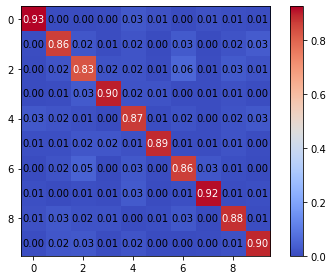

In [21]:
fig, ax = plt.subplots()

plt.imshow(confusion_SVM /counts[:,None], cmap="coolwarm",interpolation='nearest')

cm = confusion_SVM /counts[:,None]
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

plt.colorbar()  
plt.show()


## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.
